# Data Retrieval

### The following portfolio is related to the media industry and covers:
- Gaming: Sony and Take Two Interactive Software
- Music streaming: Spotify
- Movie and entertainment: Walt Disney and Netflix
- News companies: News Corp and the New York Times
- Tech magnates: Amazon and Google
- Healthcare: Johnson and Johnson

This portfolio offers diversification within the media industry which can be cyclical and high growth. To hedge this, it contains tech companies like Google and Amazon and healthcare companies like Johnson & Johnson. These lower risk and provide steady performance.

In [ ]:
import yfinance as yf
import pandas as pd

#choosing 10 global stocks
stocks = ['SONY', 'SPOT', 'DIS', 'NFLX', 'NWSA', 'NYT', 'TTWO', 'GOOGL', 'AMZN', 'JNJ']

#download 5 years of daily data
data = yf.download(stocks, start='2020-01-01', end='2024-12-31')['Close']

#save as CSV
data.to_csv('stock_data.csv')

#load it back to confirm
df = pd.read_csv('stock_data.csv', index_col='Date', parse_dates=True)
df.head()

/tmp/ipython-input-25-3025986584.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start='2020-01-01', end='2024-12-31')['Close']
[*********************100%***********************]  10 of 10 completed


,AMZN,DIS,GOOGL,JNJ,NFLX,NWSA,NYT,SONY,SPOT,TTWO
Date,,,,,,,,,,
2020-01-02,94.900497,145.769913,68.026024,124.983665,329.809998,13.628749,31.045746,13.577795,151.619995,122.080002
2020-01-03,93.748497,144.097763,67.670158,123.536667,325.899994,13.590994,31.217226,13.385118,152.500000,122.209999
2020-01-06,95.143997,143.261719,69.473839,123.382568,335.829987,13.553243,31.264860,13.587624,156.720001,124.690002
2020-01-07,95.343002,143.310898,69.339645,124.136017,330.750000,13.685377,30.969091,13.801929,156.020004,125.510002
2020-01-08,94.598503,143.015808,69.833191,124.118881,339.260010,13.723131,31.045416,13.853046,158.779999,127.820000


### Data Cleaning

This code identifies missing values, and reaffirms there are none so there is no need for further cleaning.

In [ ]:
#check for missing values
print(df.isnull().sum())

#displaying clean data
print(df.isnull().sum())
df_clean = df.copy()

AMZN     0
DIS      0
GOOGL    0
JNJ      0
NFLX     0
NWSA     0
NYT      0
SONY     0
SPOT     0
TTWO     0
dtype: int64
AMZN     0
DIS      0
GOOGL    0
JNJ      0
NFLX     0
NWSA     0
NYT      0
SONY     0
SPOT     0
TTWO     0
dtype: int64


# Data Exploration

This code displays the beginning and end prices of the portfolio from 2020-2024 and visualizes stock price trends in a graph across all 10 assets.

                 AMZN         DIS      GOOGL         JNJ        NFLX  \
Date                                                                   
2020-01-02  94.900497  145.769913  68.026024  124.983665  329.809998   
2020-01-03  93.748497  144.097763  67.670158  123.536667  325.899994   
2020-01-06  95.143997  143.261719  69.473839  123.382568  335.829987   
2020-01-07  95.343002  143.310898  69.339645  124.136017  330.750000   
2020-01-08  94.598503  143.015808  69.833191  124.118881  339.260010   

                 NWSA        NYT       SONY        SPOT        TTWO  
Date                                                                 
2020-01-02  13.628749  31.045746  13.577795  151.619995  122.080002  
2020-01-03  13.590994  31.217226  13.385118  152.500000  122.209999  
2020-01-06  13.553243  31.264860  13.587624  156.720001  124.690002  
2020-01-07  13.685377  30.969091  13.801929  156.020004  125.510002  
2020-01-08  13.723131  31.045416  13.853046  158.779999  127.820000  
     

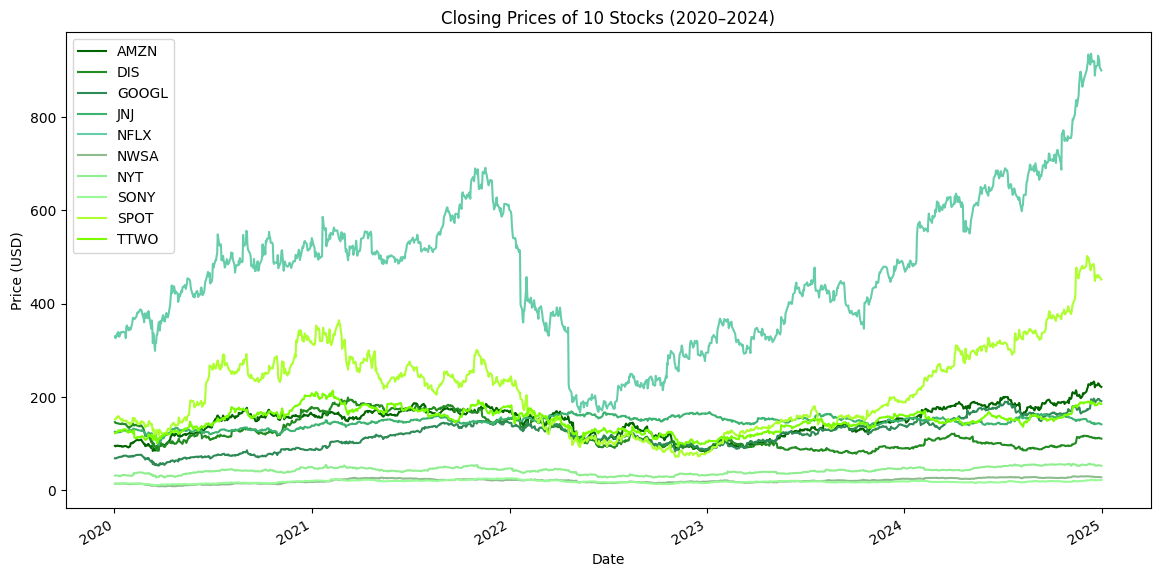

In [ ]:
import matplotlib.pyplot as plt

#printing first and last 5 rows of the cleaned data
print(df_clean.head())
print(df_clean.tail())

#defining colour scheme for each stock line
green_shades = [
    '#006400',
    '#228B22',
    '#2E8B57',
    '#3CB371',
    '#66CDAA',
    '#8FBC8F',
    '#90EE90',
    '#98FB98',
    '#ADFF2F',
    '#7CFC00'
]

#plotting all closing prices with green shades
df_clean.plot(figsize=(14, 7), color=green_shades)
plt.title("Closing Prices of 10 Stocks (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()

# Backtesting

This code applies a Bollinger Bands mean reversion strategy across each stock, generating buy and sell trading signals, simulating position-based returns, and visually comparing strategy performance against buy-and-hold to evaluate effectiveness.



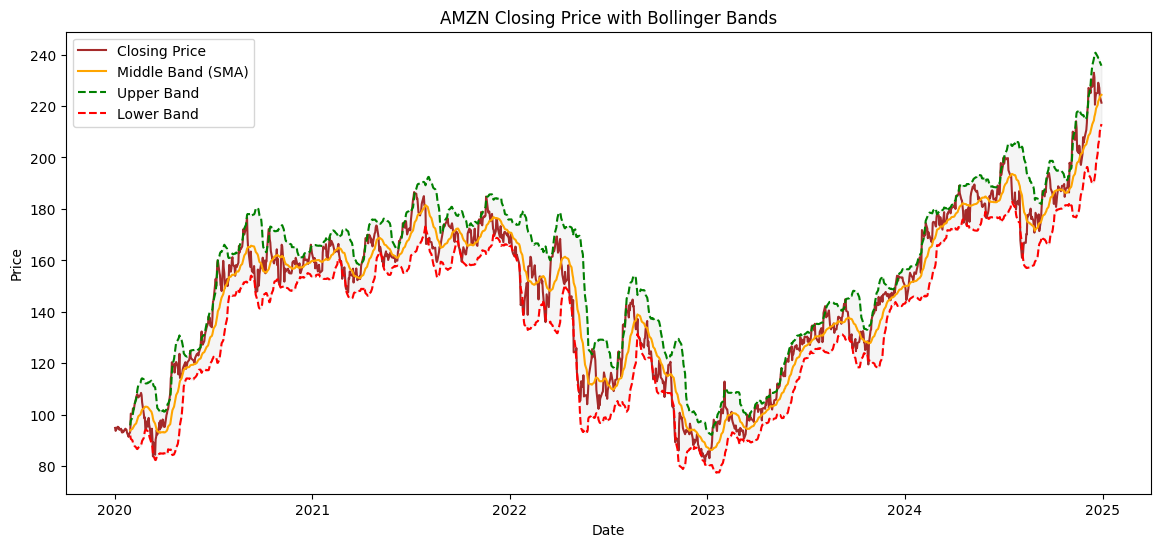

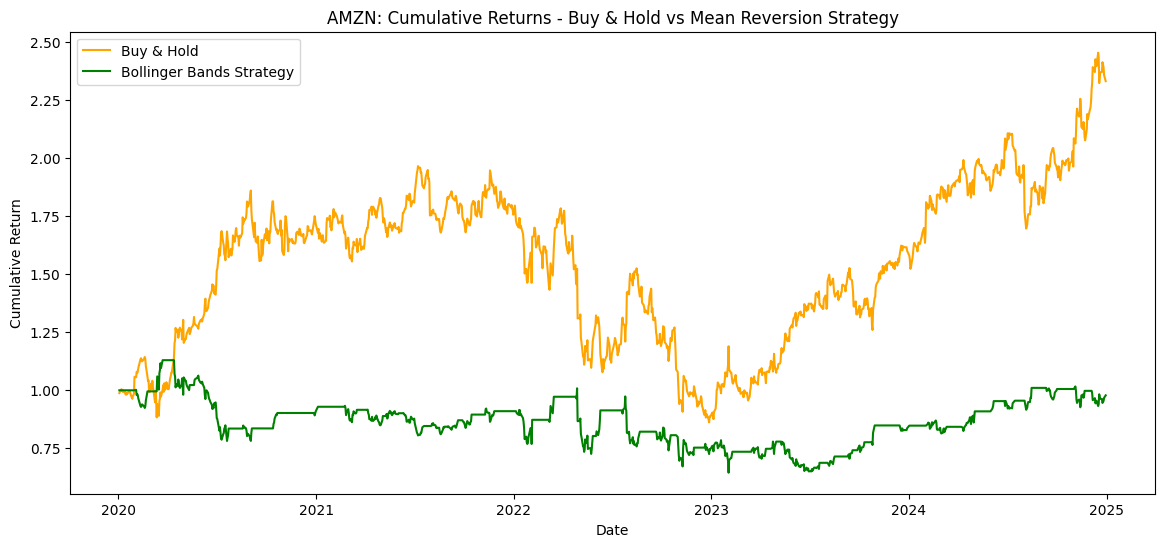

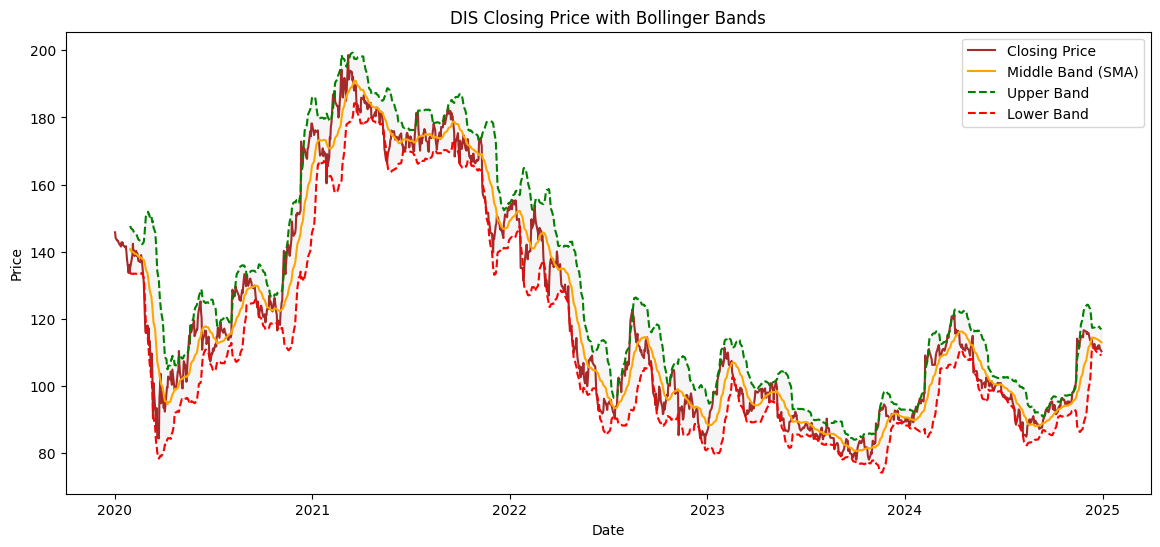

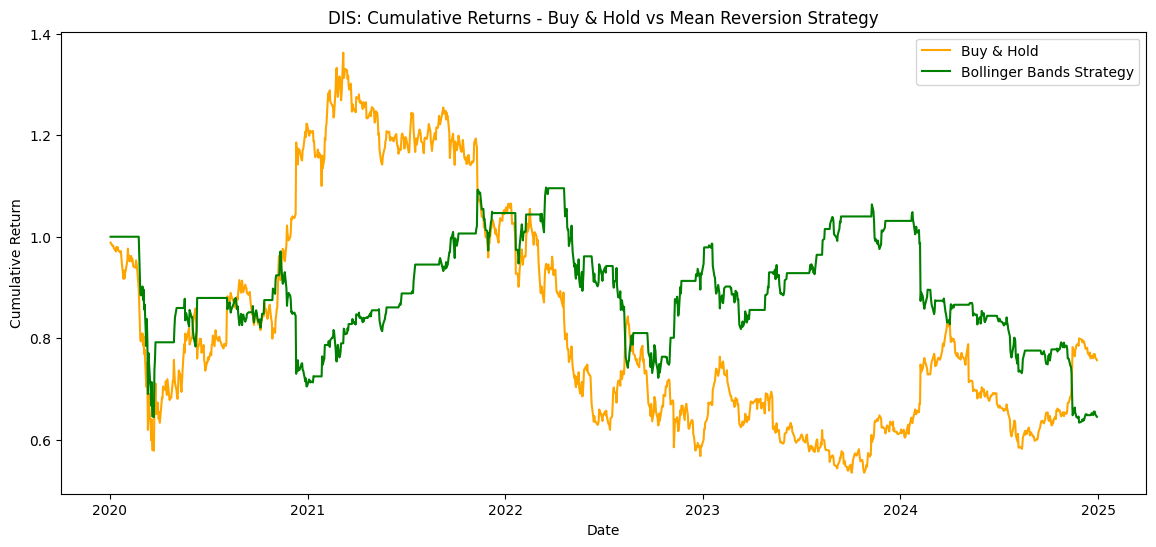

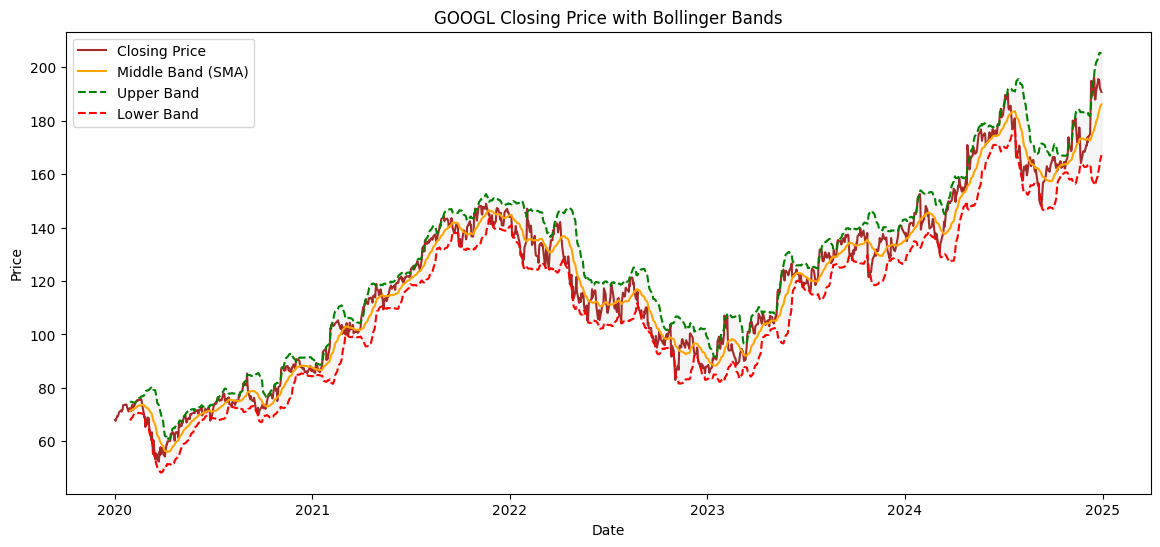

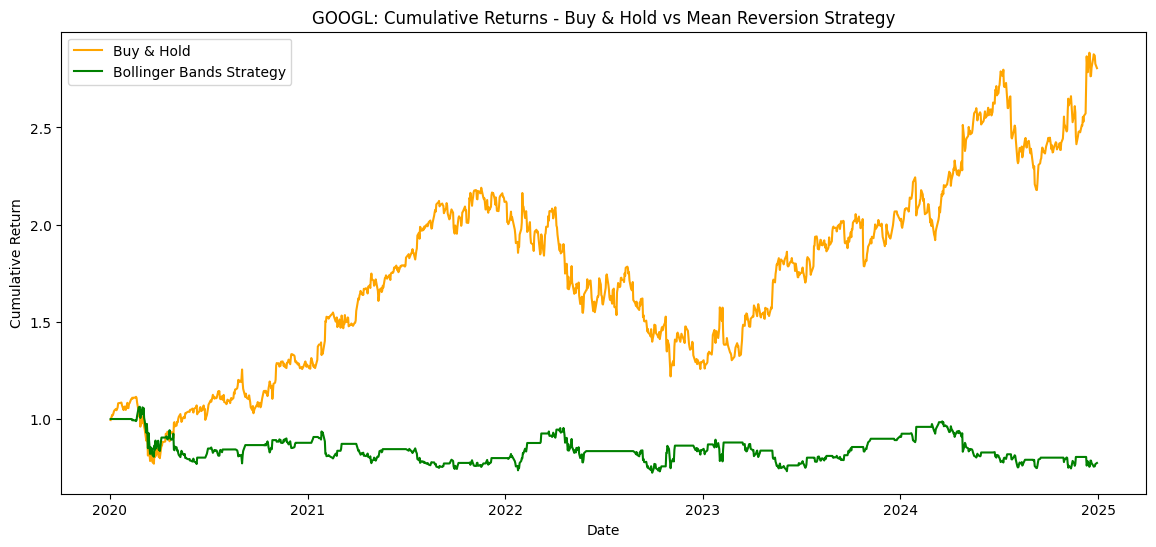

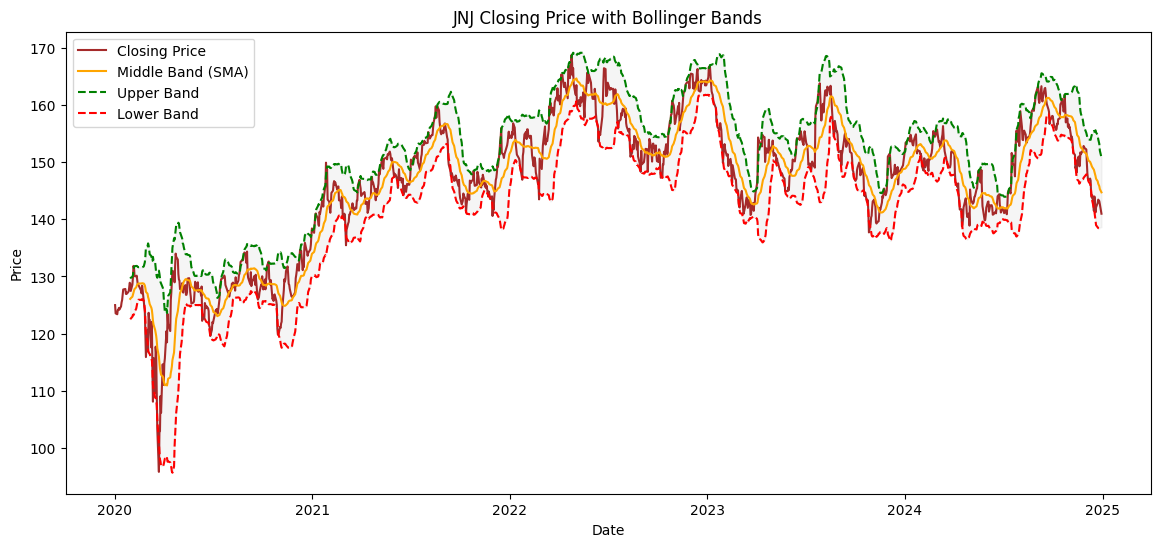

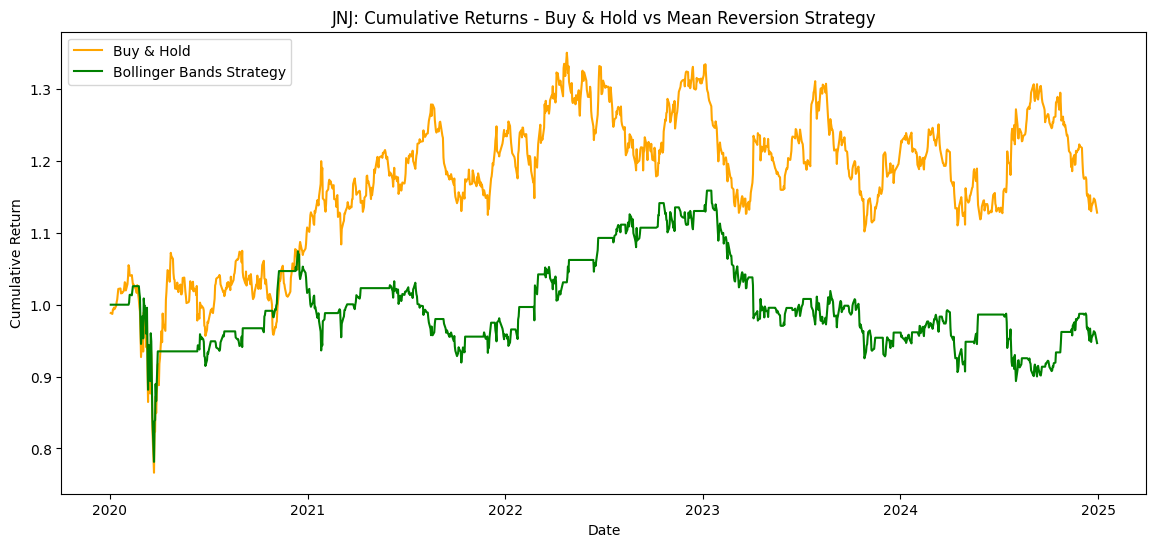

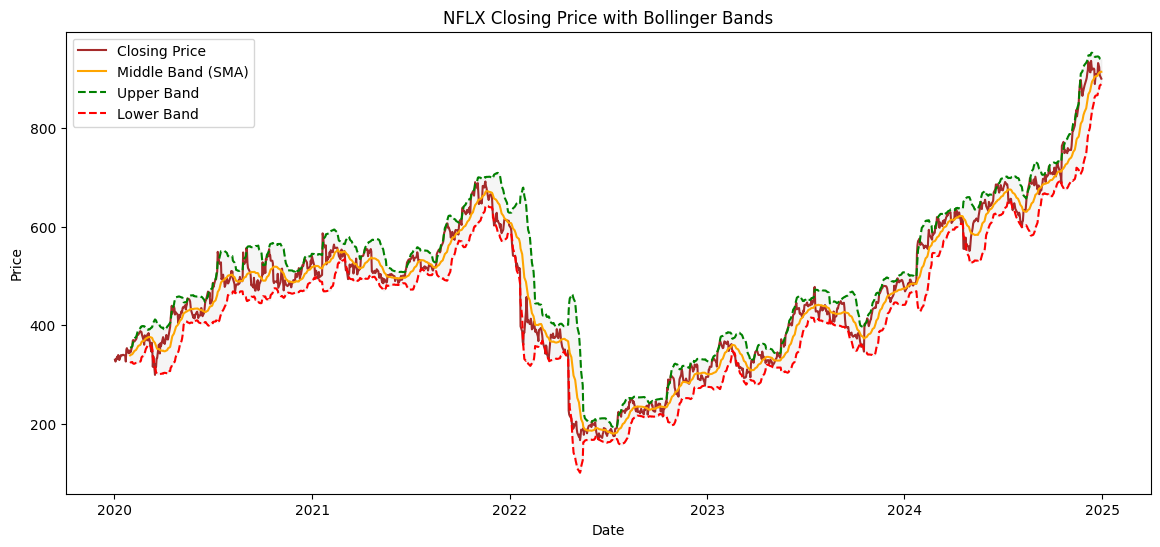

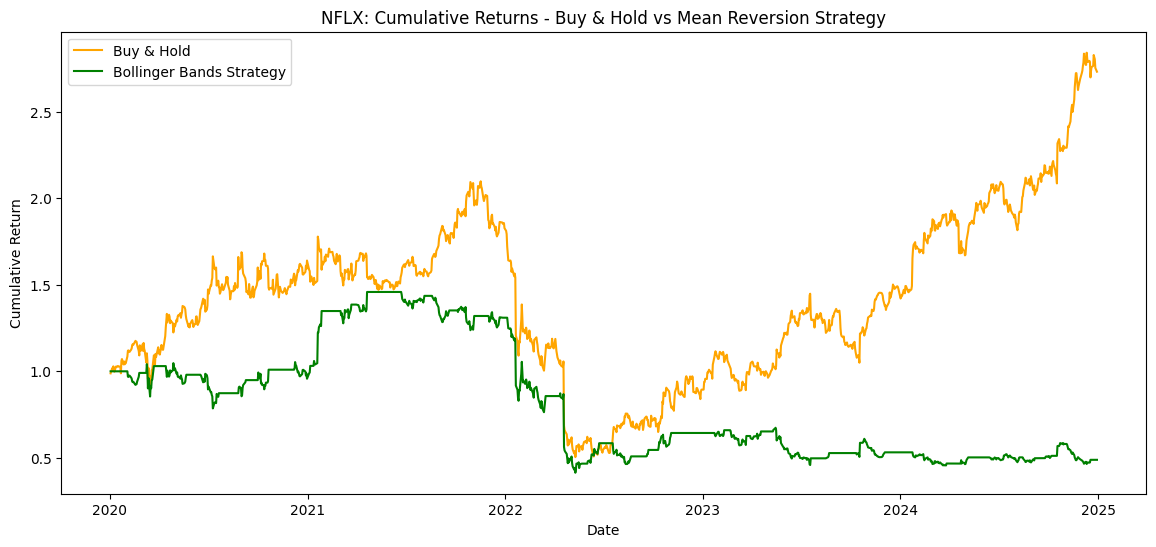

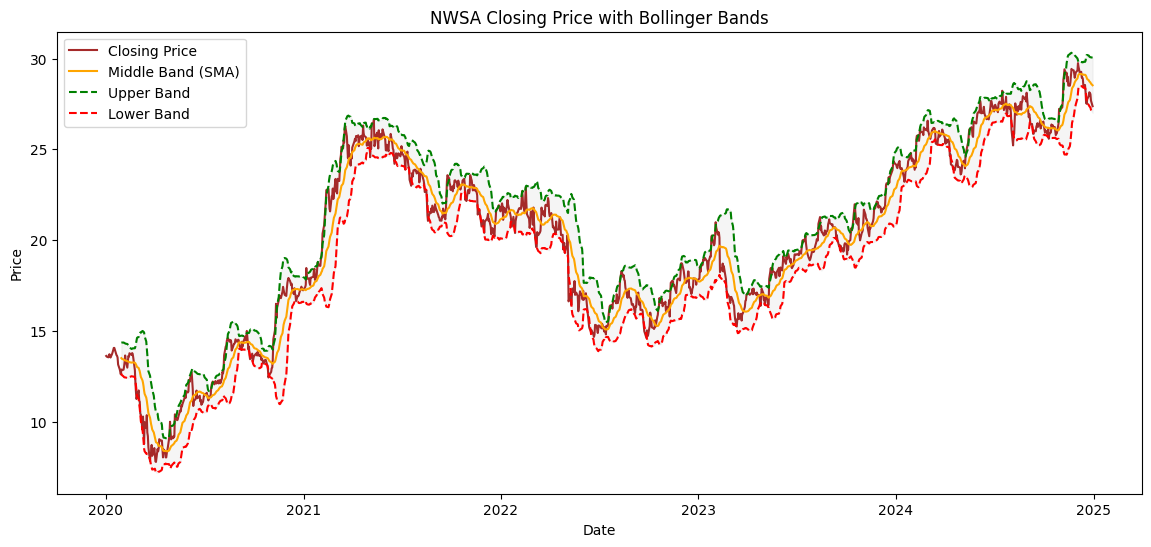

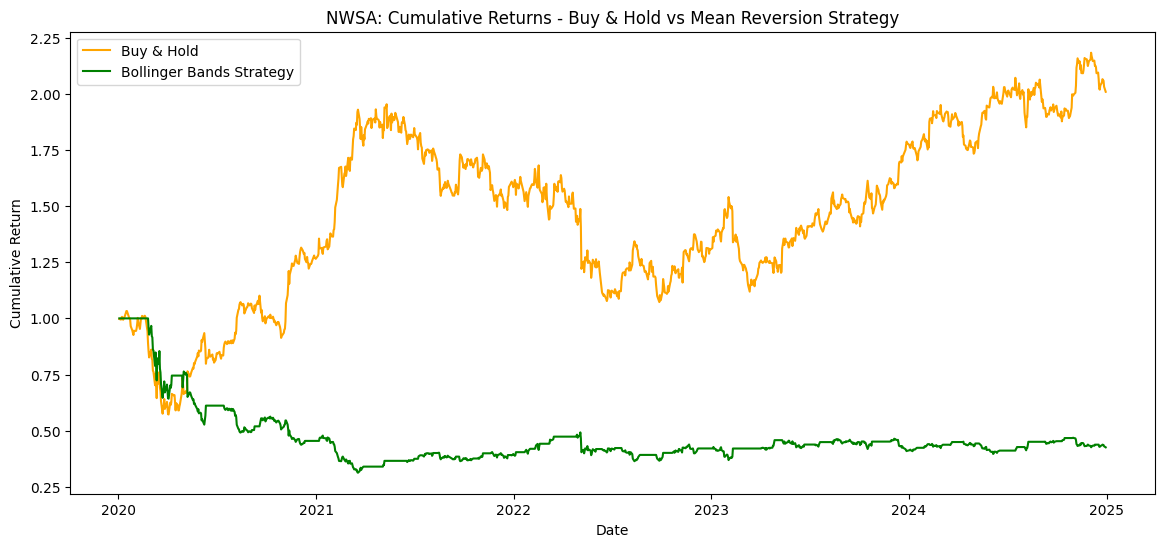

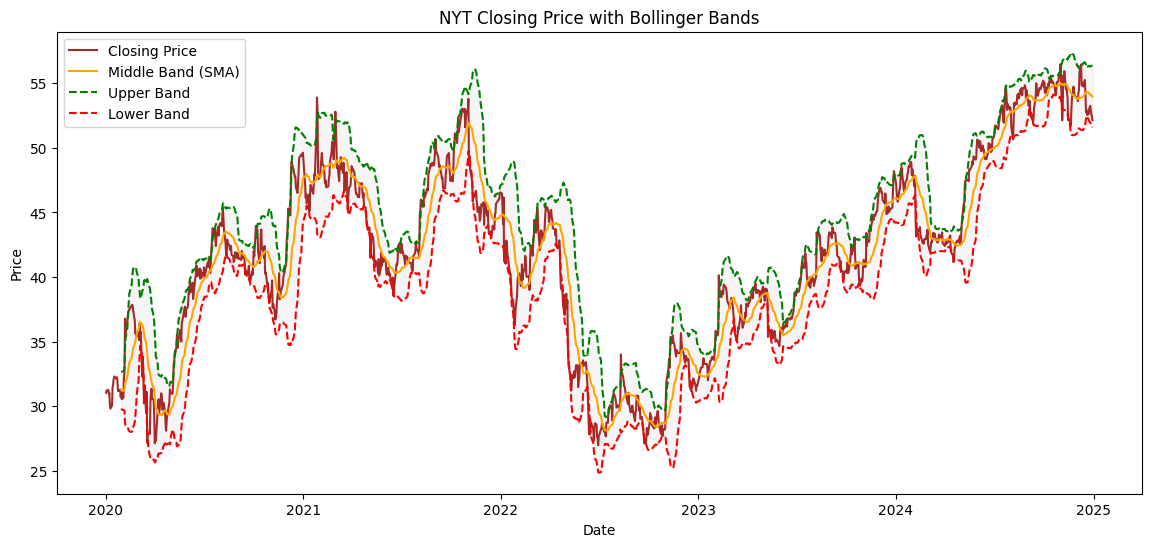

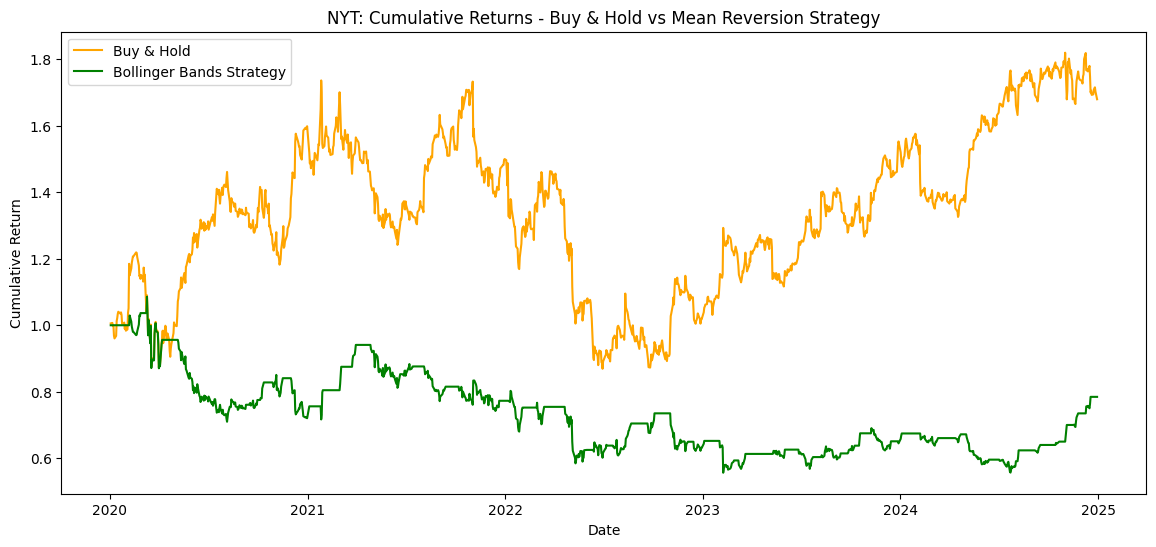

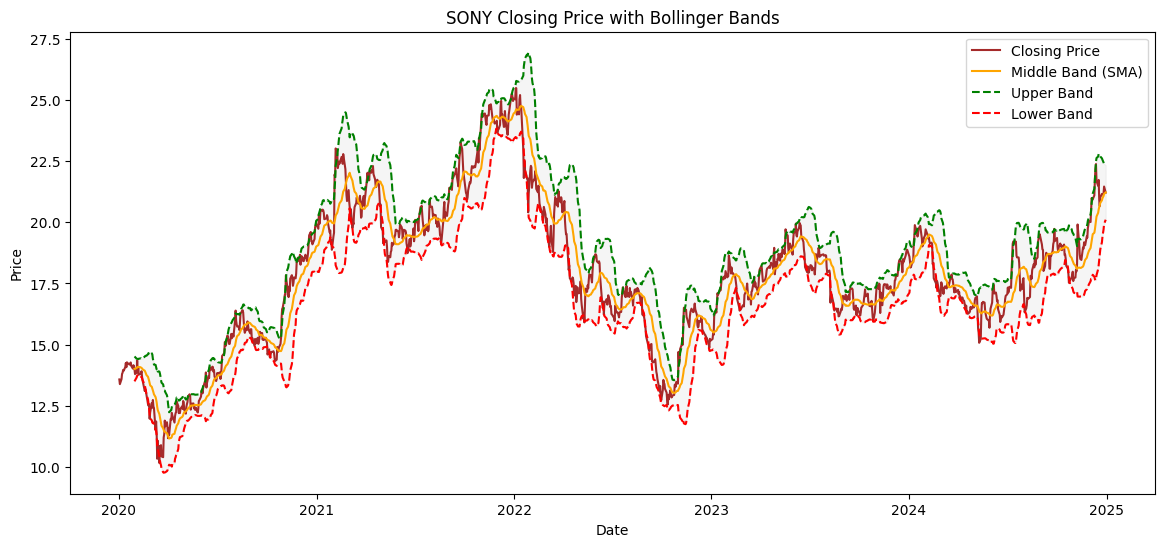

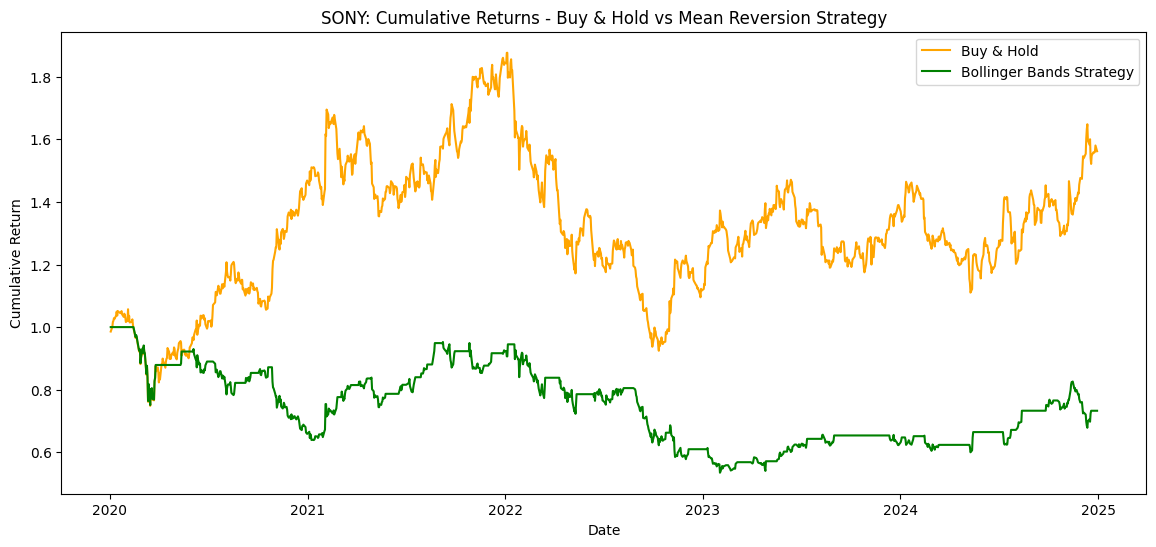

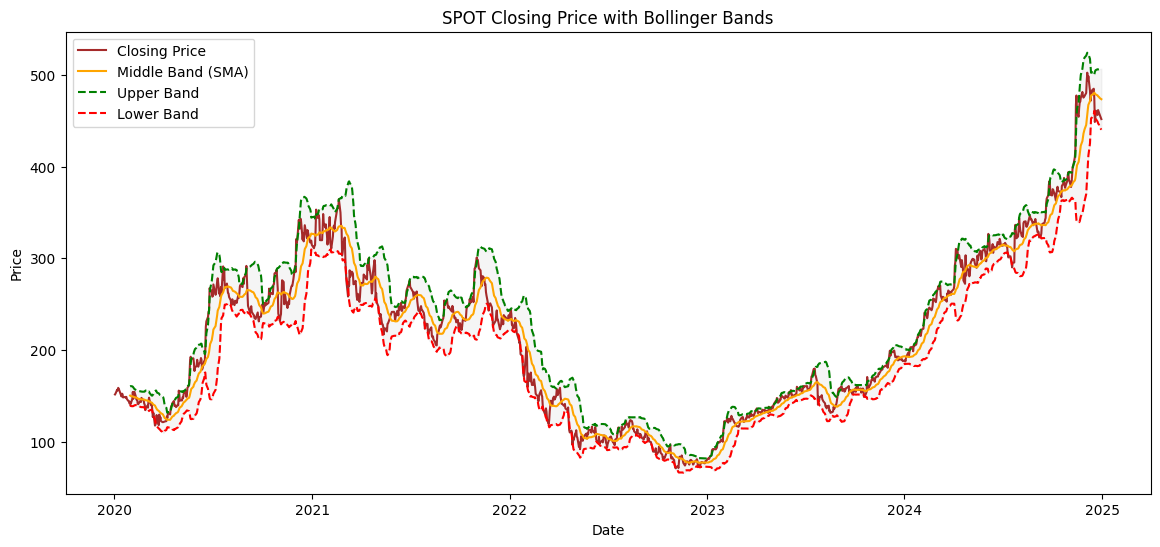

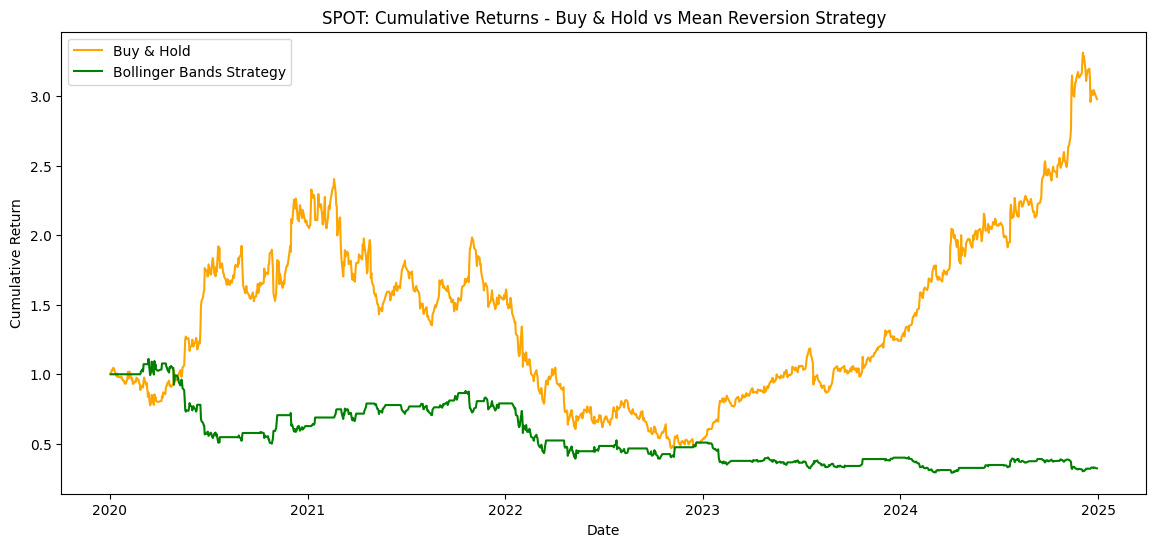

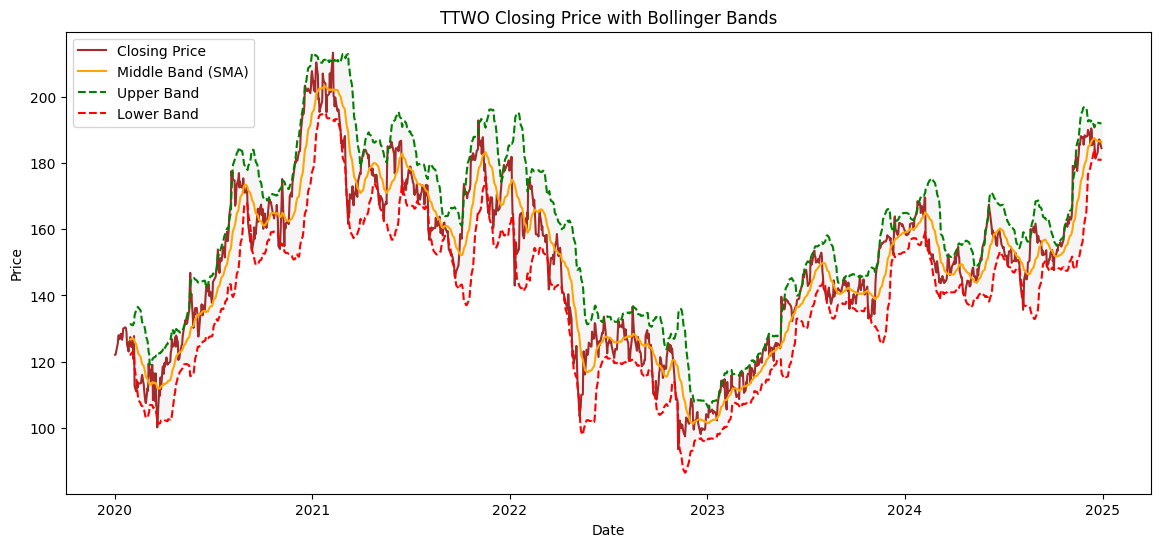

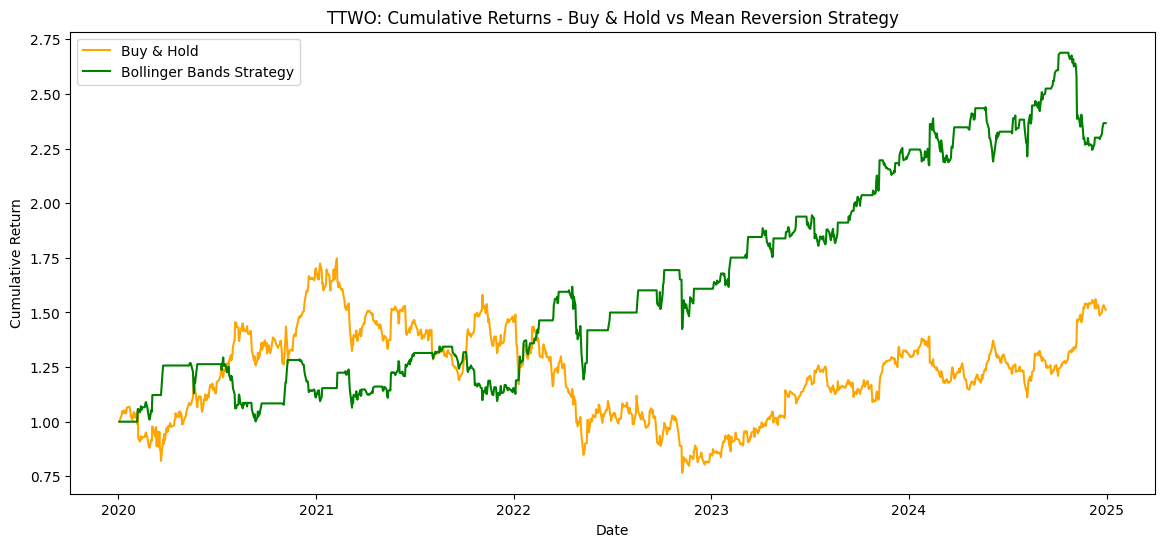

In [ ]:
import numpy as np

#assuming df_clean contains 10 stocks' closing prices

results = {}

#for loop to prepare individual dataframes with consistent 'Close' column
for stocks in df_clean.columns:
    df = pd.DataFrame(df_clean[stocks])
    df.rename(columns={stocks: 'Close'}, inplace=True)

    #calculating Bollinger Bands (20-day SMA, +/- 2 std)
    window = 20
    df['SMA'] = df['Close'].rolling(window).mean()
    df['STD'] = df['Close'].rolling(window).std()
    df['Upper'] = df['SMA'] + 2 * df['STD']
    df['Lower'] = df['SMA'] - 2 * df['STD']

    #generating Entry Signals
    df['Signal'] = 0
    df.loc[df['Close'] < df['Lower'], 'Signal'] = 1    # Buy signal
    df.loc[df['Close'] > df['Upper'], 'Signal'] = -1   # Sell signal

    #generating Exit Signals & Track Position
    df['Position'] = 0  # 1 for long, -1 for short, 0 for out
    position = 0
    for i in range(1, len(df)):
        if position == 0:
            if df['Signal'].iloc[i] == 1:
                position = 1   # Enter long
            elif df['Signal'].iloc[i] == -1:
                position = -1  # Enter short
        elif position == 1:
            #exit Buy Position when price rises back to (or above) the SMA
            if df['Close'].iloc[i] >= df['SMA'].iloc[i]:
                position = 0
        elif position == -1:
            #exit Sell Position when price falls back to (or below) the SMA
            if df['Close'].iloc[i] <= df['SMA'].iloc[i]:
                position = 0
        df.iloc[i, df.columns.get_loc('Position')] = position

    #calculating daily returns and strategy returns
    df['Returns'] = df['Close'].pct_change()
    df['Strategy'] = df['Position'].shift(1) * df['Returns']

    #cumulative returns for both strategies
    df['BuyHold'] = (1 + df['Returns']).cumprod()
    df['StratCum'] = (1 + df['Strategy']).cumprod()

    #storing DataFrame in dictionary
    results[stocks] = df

    #plotting Closing price and Bollinger Bands
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['Close'], label='Closing Price', color='brown')
    plt.plot(df.index, df['SMA'], label='Middle Band (SMA)', color='orange')
    plt.plot(df.index, df['Upper'], label='Upper Band', color='green', linestyle='--')
    plt.plot(df.index, df['Lower'], label='Lower Band', color='red', linestyle='--')
    plt.fill_between(df.index, df['Upper'], df['Lower'], color='grey', alpha=0.08)
    plt.title(f"{stocks} Closing Price with Bollinger Bands")
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()

    #plotting Cumulative returns of Buy & Hold vs Strategy
    plt.figure(figsize=(14,6))
    plt.plot(df.index, df['BuyHold'], label='Buy & Hold', color='orange')
    plt.plot(df.index, df['StratCum'], label='Bollinger Bands Strategy', color='green')
    plt.title(f"{stocks}: Cumulative Returns - Buy & Hold vs Mean Reversion Strategy")
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()

# Portfolio Management

This section visualizes the relationships between stocks using a correlation matrix of daily returns, constructs an equal-weighted portfolio of the 10 stocks, and computes its cumulative returns and standard deviation as a measure of risk. By using equal weights and focusing on historical volatility, the approach offers a balanced and transparent view of portfolio performance while ensuring risk is assessed through both correlation and variability in returns.

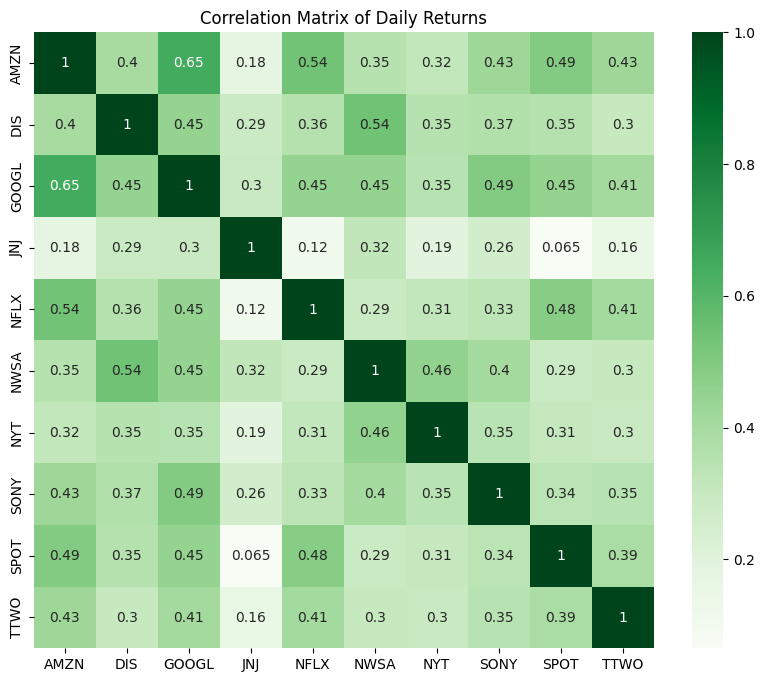

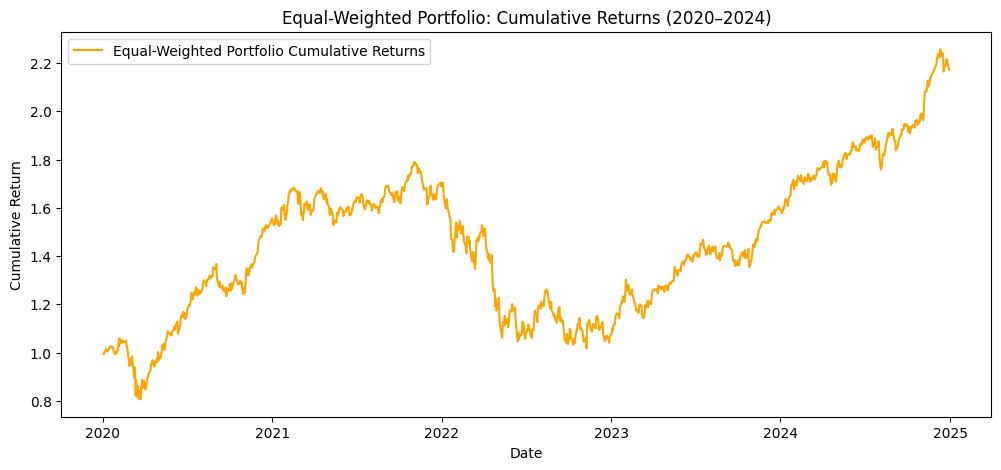

Portfolio daily standard deviation (risk): 0.01452
Portfolio annualized standard deviation (risk): 0.23048

Portfolio Returns Summary:
count    1256.000000
mean        0.000723
std         0.014519
min        -0.082860
25%        -0.006643
50%         0.001431
75%         0.008361
max         0.077713
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#visualising correlation matrix of simple daily returns

#calculating daily returns for all stocks
returns = df_clean.pct_change().dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(returns.corr(), annot=True, cmap="Greens")
plt.title("Correlation Matrix of Daily Returns")
plt.show()

#creating equal-weighted portfolio

num_stocks = returns.shape[1]
equal_weights = np.repeat(1/num_stocks, num_stocks)  # Array of 1/10 if 10 stocks

#calculating portfolio daily returns and cumulative returns

#multiplying returns by equal weights and sum across columns to get portfolio return
portfolio_returns = returns.dot(equal_weights)
portfolio_cum_returns = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12, 5))
plt.plot(portfolio_cum_returns, label="Equal-Weighted Portfolio Cumulative Returns", color="Orange")
plt.title("Equal-Weighted Portfolio: Cumulative Returns (2020–2024)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

#calculating risk: daily standard deviation of portfolio returns

portfolio_daily_std = portfolio_returns.std()
portfolio_annualized_std = portfolio_returns.std() * np.sqrt(252)

print(f"Portfolio daily standard deviation (risk): {portfolio_daily_std:.5f}")
print(f"Portfolio annualized standard deviation (risk): {portfolio_annualized_std:.5f}")

#displaying summary statistics
print("\nPortfolio Returns Summary:")
print(portfolio_returns.describe())

# Portfolio Optimisation

### Simple portfolio optimisation by maximising Sharpe ratio
This code optimizes the portfolio weights to maximize the Sharpe ratio by minimizing its negative, helping construct the most risk-efficient portfolio based on historical return and volatility data. The Sharpe optimisation is displayed where capital is allocated in a way that maximizes return per unit of risk, allowing for better performance with lower volatility.

In [ ]:
import numpy as np
from scipy.optimize import minimize

#annualization factors for daily data for annualised Sharpe
trading_days = 252

#calculating mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

#define the function to minimize (negative Sharpe Ratio)
def neg_sharpe(weights, mean_returns, cov_matrix, risk_free=0.0):
    """
    Objective function for optimization: negative Sharpe ratio.
    """
    port_return = np.dot(weights, mean_returns) * trading_days  # annualized return
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    # Avoid division by zero:
    if port_vol == 0:
        return 0
    return -(port_return - risk_free) / port_vol

#counting the number of assets in a portfolio
num_assets = len(mean_returns)
#starting with equal weights for all assets
init_guess = num_assets * [1. / num_assets]
#restricting each weight to lie between 0 and 1 (no short selling or leverage)
bounds = tuple((0, 1) for _ in range(num_assets))
#ensuring the sum of all weights equals 1 (fully invested portfolio)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

#running the optimizer
opt_result = minimize(neg_sharpe, init_guess, args=(mean_returns, cov_matrix),
                      method='SLSQP', bounds=bounds, constraints=constraints)

opt_weights = opt_result.x

#displaying results
opt_weights_df = pd.DataFrame({'Stock': returns.columns, 'Sharpe_Opt_Weight': opt_weights})

print(opt_weights_df)

   Stock  Sharpe_Opt_Weight
0   AMZN       1.862007e-17
1    DIS       9.326933e-17
2  GOOGL       4.123678e-01
3    JNJ       0.000000e+00
4   NFLX       1.774148e-01
5   NWSA       1.757439e-01
6    NYT       6.202231e-02
7   SONY       0.000000e+00
8   SPOT       1.724512e-01
9   TTWO       8.787353e-18


### Comparison between Sharpe and Equal Weighted
The performance of two portfolios, an equal-weighted portfolio and a Sharpe ratio optimized portfolio is compared by calculating their cumulative returns and visualizing how they grow over time. This comparison shows how strategic allocation (optimisation) can potentially outperform diversification (equal weights), offering insights into the efficiency and risk-adjusted performance of different portfolio construction methods.


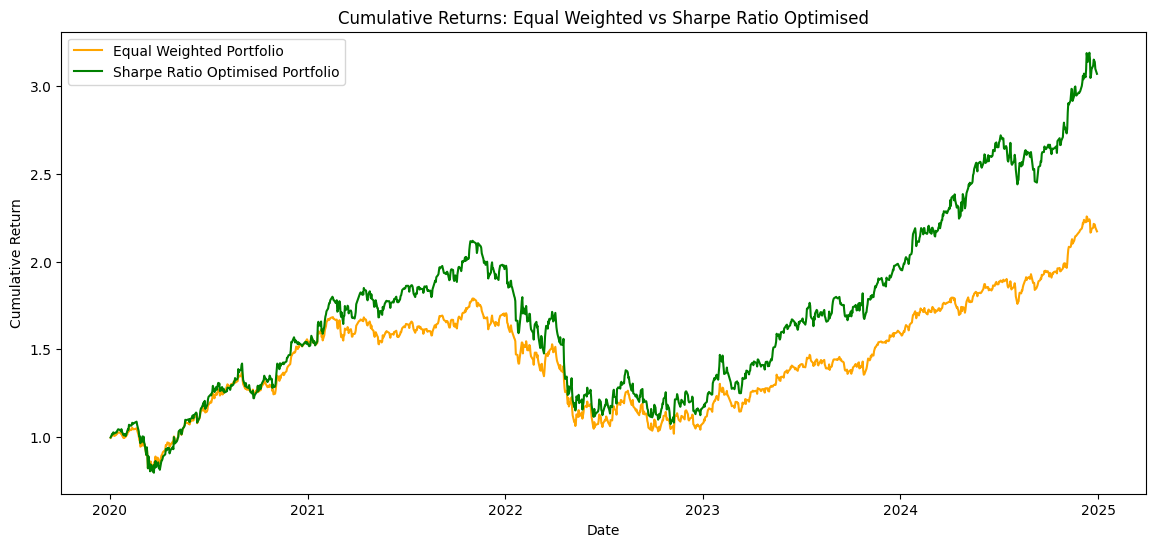

In [ ]:
#sharpe-optimised portfolio returns
sharpe_port_returns = returns.dot(opt_weights)
sharpe_port_cum = (1 + sharpe_port_returns).cumprod()

#equal weighted portfolio
equal_weights = np.repeat(1/num_assets, num_assets)
equal_port_returns = returns.dot(equal_weights)
equal_port_cum = (1 + equal_port_returns).cumprod()

#plotting for comparison
plt.figure(figsize=(14,6))
plt.plot(equal_port_cum, label='Equal Weighted Portfolio', color='orange')
plt.plot(sharpe_port_cum, label='Sharpe Ratio Optimised Portfolio', color='green')
plt.title("Cumulative Returns: Equal Weighted vs Sharpe Ratio Optimised")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()


### AI generated portfolio optimisation

Using AI-generated code from Chat GPT, I implemented a Risk Parity portfolio optimization using SciPy’s minimize function. Risk Parity is a portfolio optimization strategy that allocates capital such that each asset contributes equally to the overall portfolio risk, rather than allocating based on expected returns or simple equal weights. This encourages true diversification by balancing volatility exposure as it doesn’t rely on return forecasts and performs well in volatile or uncertain markets due to its risk-sensitive nature.

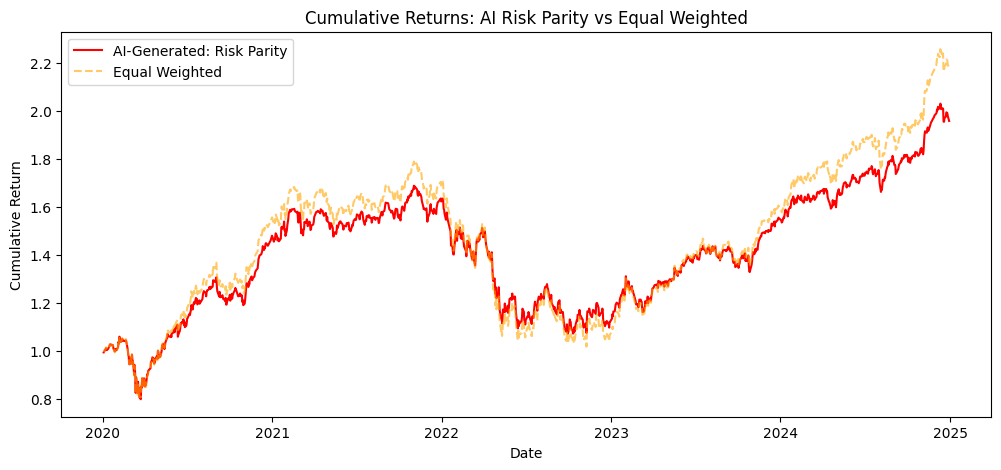

In [ ]:
#risk parity where each asset should contribute equally to portfolio volatility.
#total annualised portfolio volatility using weights and covariance matrix
def risk_contribution(weights, cov_matrix):
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * trading_days, weights)))
    #marginal risk contribution for each asset
    mrc = np.dot(cov_matrix * trading_days, weights) / port_vol
    rc = weights * mrc
    #target risk contribution where total volatility is divided equally among all assets
    target = port_vol / len(weights)
    #objective function is minimised so risk contribution is close to target
    return ((rc - target)**2).sum()

#optimisation using SciPy's minimise
risk_parity_result = minimize(risk_contribution,
                              init_guess,
                              args=(cov_matrix,),
                              method='SLSQP',
                              bounds=bounds,
                              constraints=constraints)

risk_parity_weights = risk_parity_result.x

#computing daily portfolio returns using optimised weights
risk_parity_port_returns = returns.dot(risk_parity_weights)

#calculating cumulative return over the full period
risk_parity_port_cum = (1 + risk_parity_port_returns).cumprod()

#defining equal-weighted portfolio returns and cumulative returns
num_assets = len(returns.columns)
equal_weights = np.repeat(1/num_assets, num_assets)
equal_port_returns = returns.dot(equal_weights)
equal_port_cum = (1 + equal_port_returns).cumprod()

#visualisation by plotting cumulative returns of the risk parity portfolio versus equal weighted
plt.figure(figsize=(12,5))
plt.plot(risk_parity_port_cum, label='AI-Generated: Risk Parity', color='red')
plt.plot(equal_port_cum, label='Equal Weighted', linestyle='--', alpha=0.6, color='orange')
plt.title("Cumulative Returns: AI Risk Parity vs Equal Weighted")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

### Cumulative Returns Comparison Plot
Visualising the cumulative returns of three portfolio strategies: Sharpe Ratio optimised, risk parity, and equal weighted, helps analyse a direct performance comparison across time.

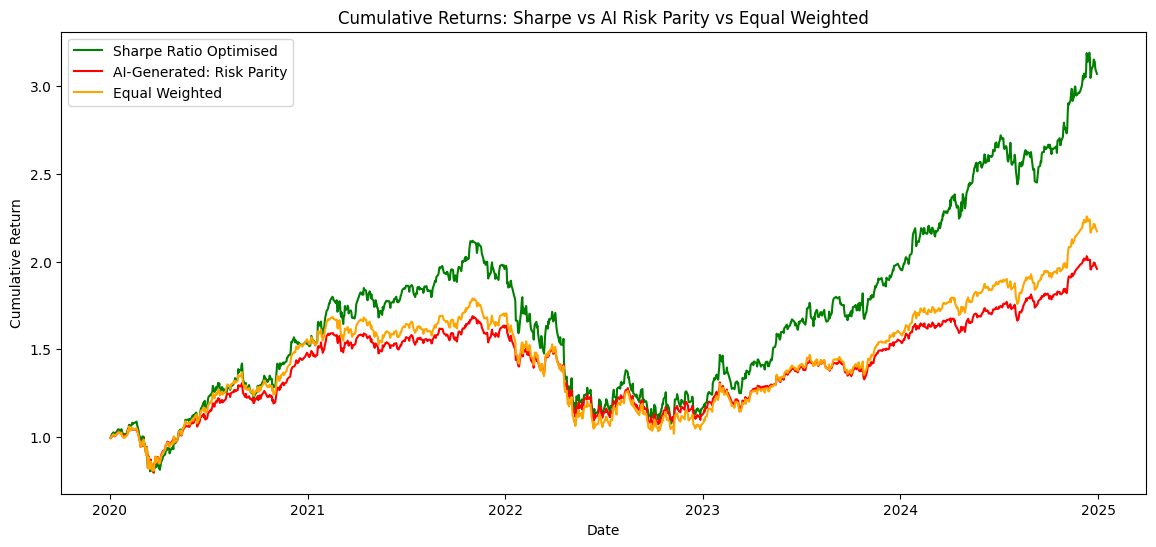

In [ ]:
#sharpe ratio optimised
sharpe_port_returns = returns.dot(opt_weights)
sharpe_port_cum = (1 + sharpe_port_returns).cumprod()

#risk parity
risk_parity_port_returns = returns.dot(risk_parity_weights)
risk_parity_port_cum = (1 + risk_parity_port_returns).cumprod()

#equal weighted
num_assets = len(returns.columns)
equal_weights = np.repeat(1/num_assets, num_assets)
equal_port_returns = returns.dot(equal_weights)
equal_port_cum = (1 + equal_port_returns).cumprod()

#plotting three graphs
plt.figure(figsize=(14,6))
plt.plot(sharpe_port_cum, label='Sharpe Ratio Optimised', color='green')
plt.plot(risk_parity_port_cum, label='AI-Generated: Risk Parity', color='red')
plt.plot(equal_port_cum, label='Equal Weighted', color='orange')
plt.title("Cumulative Returns: Sharpe vs AI Risk Parity vs Equal Weighted")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# Report


I recommend the Sharpe Ratio optimised portfolio because it outperforms the cumulative returns (3.3) for Risk Parity (2.0) and Equal Weighted (2.3) by a  large margin. Though the risk parity reduces volatility and equal weighted spreads it evenly, Sharpe optimises volatility  to take just enough risk to boost returns. This is displayed in the cumulative returns graph where the Sharpe line outperforms the other two graphs for the majority of the time the stock is held and is currently holding a significant advantage.

The proposed optimal weights for each stock are as follows according to Sharpe:

| Stock | Sharpe Optimised Weights | Weight (%) |
|-|-|-|
| AMZN  | 0.000000e+00             | 0.00%      |
| DIS   | 1.524907e-16             | 0.00%      |
| GOOGL | 4.123670e-01             | 41.24%     |
| JNJ   | 6.006053e-18             | 0.00%      |
| NFLX  | 1.774158e-01             | 17.74%     |
| NWSA  | 1.757441e-01             | 17.57%     |
| NYT   | 6.202228e-02             | 6.20%      |
| SONY  | 0.000000e+00             | 0.00%      |
| SPOT  | 1.724508e-01             | 17.25%     |
| TTWO  | 8.390552e-18             | 0.00%      |

Only TTWO should be traded because the mean Bollinger strategy outperforms the buy and hold strategy after early 2022 onwards. This is likely due to TTWO's acquisition of all outstanding shares of Zynga which led to increased price volatility and mean reverting behaviour which the Bollinger Bands capitalised on. For DIS and JNJ, the performance between the two strategies is similar and sees overlaps but overall the buy and hold strategy saw more consistent growth. For the other stocks AMZN, GOOGL, NFLX, NWSA, NYT, SONY and SPOT, buy and hold is more reliable.

The AI-generated code was generally well-structured and commented, which helped in understanding the purpose of each section. However, there were some integration challenges with the previous code. First, ensuring consistent variable naming across different code blocks required careful matching, for example, when defining weights, returns, or constraints, slight mismatches from undefined variables occasionally led to errors. Second, code modularity was not always optimal, the risk contribution or Sharpe ratio optimizer were isolated and functional but not immediately plug-and-play and needed manual alignment with previous structures.

While the Sharpe Ratio Optimised Portfolio is optimised and performs strongly in terms of cumulative returns, its allocations are heavily concentrated in a few stocks like GOOGL, NFLX, SPOT, and NWSA with near-zero weight to others. The others may have had poor or inconsistent return patterns or were more volatile so they were almost removed. This lack of diversification increases exposure to idiosyncratic risks. Rather than recommending the portfolio in its current form, I advise using the Sharpe strategy for the identified strong performers with the buy and hold strategy for other consistent performers to construct a more balanced portfolio.



